# 손글씨 분류_신경망

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

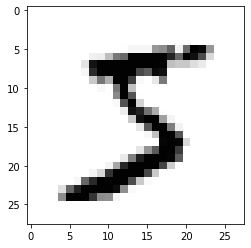

In [5]:
plt.imshow(X_train[0], cmap = 'Greys');

In [8]:
import sys
for row in X_train[0]:
    for x in row:
        sys.stdout.write(f'{x:3d} ')
    sys.stdout.write('\n')

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [9]:
# 정규화
X_train = X_train / 255.
X_test = X_test / 255.

In [10]:
# 이미지 차원 변경  : 2차원 -> 1차원
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(-1, 784)   #(28 * 28)

In [11]:
# y 값의 분포
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [13]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

In [14]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

## Drop out 없는 경우

In [15]:
model1 = Sequential([
    Dense(1000, input_dim = 784, activation = 'relu'),
    Dense(256, activation = 'relu'),
    Dense(48, activation = 'relu'),
    Dense(10, activation = 'softmax')
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 256)               256256    
                                                                 
 dense_2 (Dense)             (None, 48)                12336     
                                                                 
 dense_3 (Dense)             (None, 10)                490       
                                                                 
Total params: 1,054,082
Trainable params: 1,054,082
Non-trainable params: 0
_________________________________________________________________


In [29]:
model1.compile('adam', 'categorical_crossentropy',['accuracy'])

In [30]:
mc1 = ModelCheckpoint('mnist_best1.h5', verbose = 1, save_best_only = True)
es1 = EarlyStopping(patience = 10)
hist1 = model1.fit(X_train, Y_train, validation_split=0.2,
                   epochs = 100, batch_size = 200, verbose = 0,
                   callbacks = [mc1, es1])


Epoch 1: val_loss improved from inf to 0.12565, saving model to mnist_best1.h5

Epoch 2: val_loss improved from 0.12565 to 0.09835, saving model to mnist_best1.h5

Epoch 3: val_loss improved from 0.09835 to 0.08339, saving model to mnist_best1.h5

Epoch 4: val_loss did not improve from 0.08339

Epoch 5: val_loss did not improve from 0.08339

Epoch 6: val_loss did not improve from 0.08339

Epoch 7: val_loss did not improve from 0.08339

Epoch 8: val_loss did not improve from 0.08339

Epoch 9: val_loss did not improve from 0.08339

Epoch 10: val_loss did not improve from 0.08339

Epoch 11: val_loss did not improve from 0.08339

Epoch 12: val_loss did not improve from 0.08339

Epoch 13: val_loss did not improve from 0.08339


In [31]:
best_model1 = load_model('mnist_best1.h5')
best_model1.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0846 - accuracy: 0.9743


[0.08464588224887848, 0.9743000268936157]

## Drop out 있는 경우

In [24]:
model2 = Sequential([
    Dense(1000, input_dim = 784, activation = 'relu'),
    Dropout(0.25),      # 1000개 중 250개를 학습 할 때는 끔.(실전에는 사용)
    Dense(256, activation = 'relu'),
    Dropout(0.25),
    Dense(48, activation = 'relu'),
    Dense(10, activation = 'softmax')
])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1000)              785000    
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0         
                                                                 
 dense_9 (Dense)             (None, 256)               256256    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 48)                12336     
                                                                 
 dense_11 (Dense)            (None, 10)                490       
                                                                 
Total params: 1,054,082
Trainable params: 1,054,082
No

In [27]:
model2.compile('adam', 'categorical_crossentropy',['accuracy'])

In [32]:
mc2 = ModelCheckpoint('mnist_best2.h5', verbose = 1, save_best_only = True)
es2 = EarlyStopping(patience = 10)
hist1 = model1.fit(X_train, Y_train, validation_split=0.2,
                   epochs = 100, batch_size = 200, verbose = 0,
                   callbacks = [mc2, es2])


Epoch 1: val_loss improved from inf to 0.10835, saving model to mnist_best2.h5

Epoch 2: val_loss did not improve from 0.10835

Epoch 3: val_loss did not improve from 0.10835

Epoch 4: val_loss did not improve from 0.10835

Epoch 5: val_loss improved from 0.10835 to 0.10609, saving model to mnist_best2.h5

Epoch 6: val_loss did not improve from 0.10609

Epoch 7: val_loss did not improve from 0.10609

Epoch 8: val_loss did not improve from 0.10609

Epoch 9: val_loss did not improve from 0.10609

Epoch 10: val_loss did not improve from 0.10609

Epoch 11: val_loss did not improve from 0.10609

Epoch 12: val_loss improved from 0.10609 to 0.09919, saving model to mnist_best2.h5

Epoch 13: val_loss did not improve from 0.09919

Epoch 14: val_loss did not improve from 0.09919

Epoch 15: val_loss did not improve from 0.09919

Epoch 16: val_loss did not improve from 0.09919

Epoch 17: val_loss did not improve from 0.09919

Epoch 18: val_loss did not improve from 0.09919

Epoch 19: val_loss did

In [33]:
best_model2 = load_model('mnist_best2.h5')
best_model2.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0785 - accuracy: 0.9835


[0.07851912081241608, 0.9835000038146973]